In [74]:

import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
import cb_loss as cb
importlib.reload(cb)

import autoencoder_models as ae_m
import variational_autoencoder_models as vae_m
importlib.reload(ae_m)
importlib.reload(vae_m)

<module 'variational_autoencoder_models' from 'c:\\Users\\Lukas\\Desktop\\VSCode Project\\JL-ML\\JL-ML\\Autoencoder\\completed\\variational_autoencoder_models.py'>

In [62]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [70]:
import cont_bern_loss
importlib.reload(cont_bern_loss)
from cont_bern_loss import cont_bern_loss as cb_loss

cb_loss(x_test, x_test)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9655647>

In [71]:
input_shape = x_train.shape[1:]
print(input_shape)
latent_dim = 10

model = vae_m.get_mnist_cnn_shallow(input_shape, latent_dim)

(28, 28, 1)


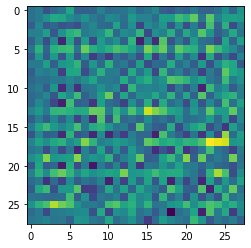

In [75]:
img = model(x_test)[0]

plt.imshow(img)

In [77]:
model.compile(optimizer='adam', reconstruction_loss=cb_loss)
model.fit(x_train, batch_size=512, epochs=2)

Epoch 1/2
118/118 [==============================] - 37s 305ms/step - Total loss: -733.9280 - Reconstruction loss: -742.9943 - Latent loss: 9.0663
Epoch 2/2
118/118 [==============================] - 38s 322ms/step - Total loss: -1455.3289 - Reconstruction loss: -1458.6553 - Latent loss: 3.3266


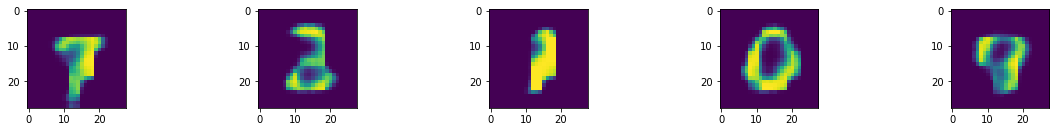

In [82]:
nbr_points = 5

decoded = model(x_test[0:5])

plt.figure(figsize=(20, 4))
for i in range(nbr_points):
    ax = plt.subplot(2, nbr_points, i+1)
    plt.imshow(x_test[i])
    
for i in range(nbr_points):
    ax = plt.subplot(2, nbr_points, nbr_points + i+1)
    plt.imshow(decoded[i])
